Importing necessary libraries...

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Opening the datasets...

In [5]:
cab_data = pd.read_csv('CAB.csv')
city_data = pd.read_csv('CITY.csv')
customer_data = pd.read_csv('CUSTOMER_INFO.csv')
customer_data_male = pd.read_csv('MALE_AVERAGE_AGE_INCOME.csv')
customer_data_female = pd.read_csv('FEMALE_AVERAGE_AGE_INCOME.csv')
transaction_data = pd.read_csv('TRANSACTIONS_INFO.csv')
pink_cost_data = pd.read_csv('PINK_KM_COST.csv')
yellow_cost_data = pd.read_csv('YELLOW_KM_COST.csv')

# 1) Which company has the majority share of travel on average? And also, demonstrate the result city-by-city.

In [10]:
comapny_share = pd.pivot_table(cab_data, index = 'City', columns = 'Company', values = 'Kilometers', aggfunc = 'mean')

In [11]:
comapny_share

Company,Pink Cab,Yellow Cab
City,,
ATLANTA GA,22.539824,22.248247
AUSTIN TX,21.969176,22.512840
BOSTON MA,22.740746,22.543649
CHICAGO IL,22.511070,22.659493
DALLAS TX,22.021203,22.599395
DENVER CO,22.459218,22.444097
LOS ANGELES CA,22.635629,22.688117
MIAMI FL,22.299925,22.635606
NASHVILLE TN,22.528066,22.968837


<AxesSubplot:xlabel='City'>

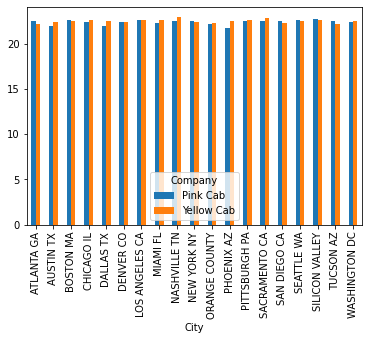

In [13]:
comapny_share.plot(kind = 'bar')

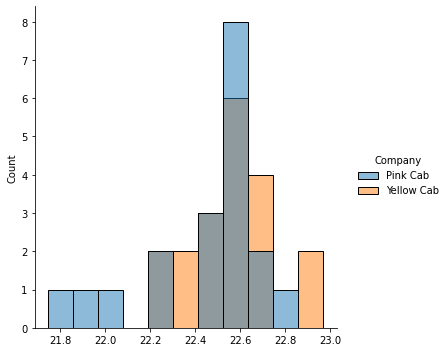

In [12]:
sns.displot(comapny_share, color = 'blue')

From the distribution found above, we can see that the Yellow Cab Company has a bigger market share than the Pink Cab Company 

Conclusion of the 1st hypothesis;
We can see from the result above that both companies roughly have a close market control among each city.




# 2) Interprete if there's a correlation between the customers' age & income and analyze whether that has any effect on their decision-making?

In [6]:
male_age_correlation = pd.pivot_table(customer_data[customer_data['Gender'] == 'Male'], index = 'Gender', values = 'Age', aggfunc = 'mean')

In [7]:
male_age_correlation['Income'] = pd.pivot_table(customer_data[customer_data['Gender'] == 'Male'], index = 'Gender', values = 'Income', aggfunc = 'mean')

In [8]:
male_age_correlation

,Age,Income
Gender,,
Male,35.410361,15040.79546


In [9]:
female_age_correlation = pd.pivot_table(customer_data[customer_data['Gender'] == 'Female'], index = 'Gender', values = 'Age', aggfunc = 'mean')

In [10]:
female_age_correlation['Income'] = pd.pivot_table(customer_data[customer_data['Gender'] == 'Female'], index = 'Gender', values = 'Income', aggfunc = 'mean')

In [11]:
female_age_correlation

,Age,Income
Gender,,
Female,35.307621,14986.068601


In [12]:
gender_distribution = pd.pivot_table((customer_data), index = 'Gender', values = 'Customers', aggfunc = 'count')

In [13]:
gender_distribution['Percentage'] = gender_distribution['Customers'] / gender_distribution['Customers'].sum()

In [14]:
gender_distribution

,Customers,Percentage
Gender,,
Female,22609,0.459804
Male,26562,0.540196


<AxesSubplot:xlabel='Gender'>

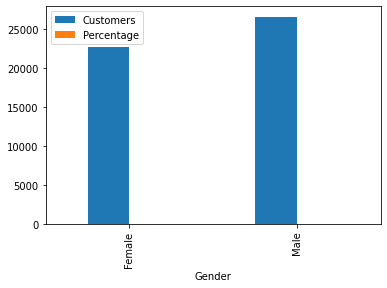

In [15]:
gender_distribution.plot(kind = 'bar')

Shows how many of the customers are male and female.

In [44]:
income_age_distribution = pd.pivot_table((customer_data), index = 'Age', values = 'Income', aggfunc = 'mean')

<AxesSubplot:xlabel='Age'>

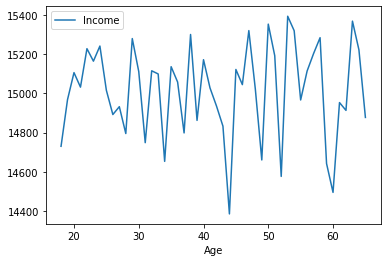

In [49]:
income_age_distribution.plot(kind = 'line')

From this demonstration we cannot claim that income raises or falls depending on the age of the cistomer because there are that is not meaningful enough to make such a claimer.

In [66]:
gender_age_distribution = pd.pivot_table((customer_data), index = 'Age', columns = 'Gender', values = 'Customers', aggfunc = 'count')

<AxesSubplot:xlabel='Age'>

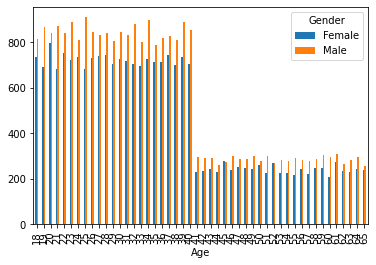

In [70]:
gender_age_distribution.plot(kind = 'bar')

Above, is a barplot showing the age distribution among both genders

In [110]:
male_income_age_correlation = pd.pivot_table(customer_data_male, index = 'Age', values = 'Average Income')

<AxesSubplot:xlabel='Age'>

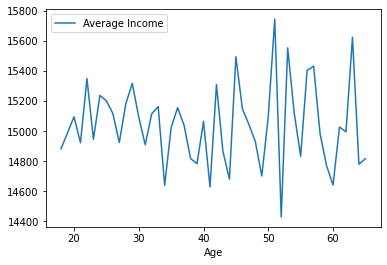

In [112]:
male_income_age_correlation.plot(kind = 'line')

In this graph, we can easily see that the income of males peaks at the middle-age years (`50)

In [113]:
female_income_age_correlation = pd.pivot_table(customer_data_female, index = 'Age', values = 'Average Income')

<AxesSubplot:xlabel='Age'>

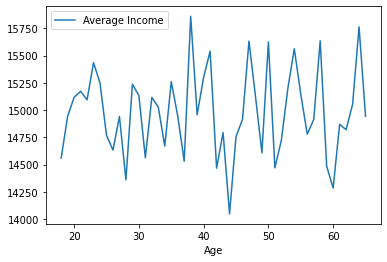

In [115]:
female_income_age_correlation.plot(kind = 'line')

On the other hand, the peak here for females is earlier than that of males'. At around age ~38.

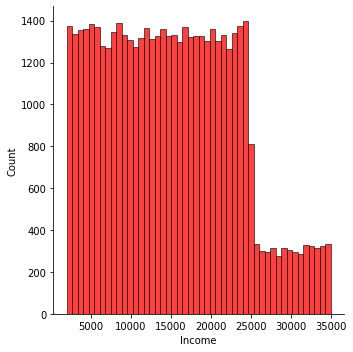

In [103]:
sns.displot(customer_data['Income'].dropna(), color = 'Red')
sns.xl

And lastly for this hypothesis, we generally realize that the peak income for both genders regardless or age, is somewhere between 3,000 & 21,000 depending on other factors not provided in the dataset.

Conclusion of the 2nd hypothesis;
According to the data found above, Males earn more than females do on average.
Also, The total quantity of males exceeds that of females'.
Though, some of our coclusions deomstrate that these results are %100 accurate and are just a generilization and a helpful way in order to visualize the data.

Takeaway: There's a weak and insufficient correlation between age & income of the customers that may or may not impact their decisions.

# 3) Determine which company is more profitable.

In [16]:
profits = pd.pivot_table((cab_data), index = 'Company', values = 'Profit', aggfunc = 'sum')

In [17]:
profits

,Profit
Company,
Pink Cab,5.307328e+06
Yellow Cab,4.402037e+07


<AxesSubplot:xlabel='Company'>

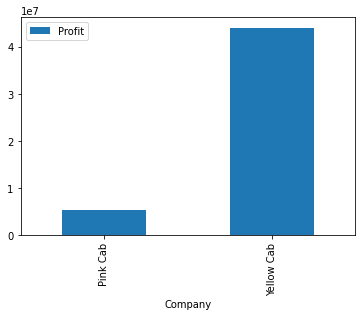

In [18]:
profits.plot(kind = 'bar')

Conclusion to the 3rd hypothsis; 
Here, you can easily see which company is more profitable, The Yellow Cab Company is about 4.5 as profitable as the Pink Cab Company is.

# 4) Is cash the more relevant method of payment? If not, then plot some data that would prove otherwise

In [19]:
preference = pd.pivot_table((transaction_data), index = 'Method', values = 'Customer', aggfunc = 'count')

In [20]:
preference['Percentage'] = preference['Customer'] / preference['Customer'].sum()

In [21]:
preference

,Customer,Percentage
Method,,
Card,263991,0.599846
Cash,176107,0.400154


<AxesSubplot:xlabel='Method'>

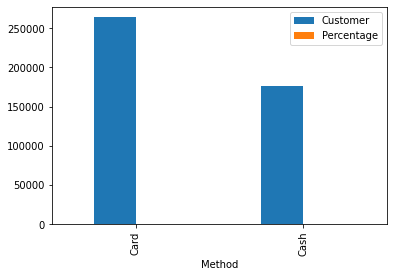

In [22]:
preference.plot(kind = 'bar')

Conclusion of the 4th hypothesis;
Clearly, Cash is not the most common mehod of payment as shown above in the plot.

# 5) What is the most common season of travel among the data given? Is it in the summer? Winter? Spring? If not please explain.

In [23]:
travel_time = pd.pivot_table(cab_data, index = 'Date', columns = 'Company', values = 'ID', aggfunc = 'count')

In [24]:
travel_time

Company,Pink Cab,Yellow Cab
Date,,
A,11822,40935
D,11568,35439
F,3375,14932
J,17524,58039
M,9183,36164
N,11005,31695
O,10576,30276
S,9658,27201


<AxesSubplot:xlabel='Date'>

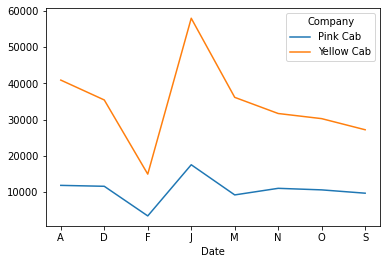

In [25]:
travel_time.plot(kind = 'line')

Conclusion of the 5th hypothesis;
We understand from this intuitive graph above that month of July (summer) has the highest frequency of travel for both companies.

# 6) How costly is each kilometer traveled to each city for each company? Is it a figure out weighs the profit margins for the compnies? 
# Expalin with realtive statistics and plots

In [26]:
average_km_cost_pink_cab = pd.pivot_table(pink_cost_data, index = 'City', columns = 'Company', values = 'Average_KM_Cost')

In [27]:
average_km_cost_pink_cab

Company,Pink Cab
City,
ATLANTA GA,10.985871
AUSTIN TX,10.992807
BOSTON MA,10.994825
CHICAGO IL,10.997515
DALLAS TX,10.994190
DENVER CO,11.001649
LOS ANGELES CA,10.998375
MIAMI FL,10.983749
NASHVILLE TN,10.970503


<AxesSubplot:xlabel='City'>

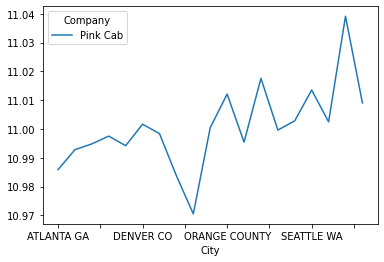

In [28]:
average_km_cost_pink_cab.plot(kind = 'line')

Above is the average cost of each kilometer traveled by the Pink Cab Company, which is 11.00062

In [29]:
average_km_cost_yellow_cab = pd.pivot_table(yellow_cost_data, index = 'City', columns = 'Company', values = 'Average_KM_Cost')

In [30]:
average_km_cost_yellow_cab

Company,Yellow Cab
City,
ATLANTA GA,13.197252
AUSTIN TX,13.192443
BOSTON MA,13.203577
CHICAGO IL,13.199653
DALLAS TX,13.184352
DENVER CO,13.205354
LOS ANGELES CA,13.204038
MIAMI FL,13.212478
NASHVILLE TN,13.205805


<AxesSubplot:xlabel='City'>

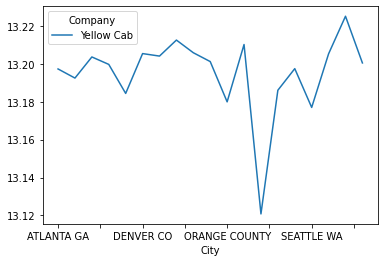

In [31]:
average_km_cost_yellow_cab.plot(kind = 'line')

And for the Yellow Cab Company, we've found that its average cost per kilometer is 13.19516, which $2 costlier than its rival Pink Cab

# Conclusion and investment desicion:
# We've obviously witnessed how profitable is the Yellow Cab Compoany compared to the opponent company, therefore XYZ company can invest in this company knowing it'll be on the profiting side. 

-

# And here we are at the conculsion of my EDA Notebook!
# I hope you were fascinated by my works.
# Thank you very much for taking the time and patience to analyze it :)



-

# Abdullah Kasri